# Craiglist Used Cars
### A cursory exploration of pricing

- Library Imports and basic configurations
- data_prep.py contains the core data processing code 

In [1]:
import pandas as pd
import math
from itertools import combinations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from data_prep import *
%matplotlib inline
#Configure pandas
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 50
figsize = (15,4)

In [2]:
#raw_car_data = pd.read_csv('vehicles.csv')

#### Run processing pipeline with EDA aggregations

In [ ]:
used_cars = run_processing_pipeline(run_eda = True) #Caution! Long running process

- Executes data processing pipeline and generates EDA aggregate files in ./eda

In [2]:
used_cars = process_raw_data(pd.read_csv('vehicles.csv'))

0. === Copying Data : (539759, 25)
1. === Drop Columns : (539759, 24)
2. === Filling Nulls : (539759, 24)
   2.1 === id
   2.2 === url
   2.3 === region
   2.4 === region_url
   2.5 === price
   2.6 === year
   2.7 === manufacturer
   2.8 === model
   2.9 === condition
   2.10 === cylinders
   2.11 === fuel
   2.12 === odometer
   2.13 === title_status
   2.14 === transmission
   2.15 === vin
   2.16 === drive
   2.17 === size
   2.18 === type
   2.19 === paint_color
   2.20 === image_url
   2.21 === description
   2.22 === state
   2.23 === lat
   2.24 === long
3. === Calculate Age : (539759, 25)
4. === Removing price Outliers : (491501, 25)
4. === Removing car_age Outliers : (485892, 25)
4. === Removing odometer Outliers : (485208, 25)
8. === Binning car_age : (485208, 26)
8. === Binning odometer : (485208, 27)
   === CCLean


#### Visually Inspect Data

In [4]:
used_cars.head()

,id,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,car_age_bckt,odometer_bckt,price
0,7088746062,acura,NA,NA,gas,clean,automatic,NA,NA,other,blue,nc,"(6.917, 11.833]","(60000.0, 100000.0]",10299
2,7088744126,jaguar,excellent,NA,gas,clean,automatic,NA,NA,NA,blue,nc,"(6.917, 11.833]","(60000.0, 100000.0]",9500
3,7088743681,honda,NA,NA,gas,clean,automatic,fwd,NA,SUV,orange,nc,"(16.75, 21.667]","(200000.0, 400000.0]",3995
4,7074612539,chevrolet,NA,NA,gas,clean,automatic,NA,NA,NA,NA,ne,"(1.941, 6.917]",NaN,41988
5,7088741557,kia,NA,NA,gas,clean,automatic,4wd,NA,wagon,NA,nc,"(1.941, 6.917]","(60000.0, 100000.0]",12995


In [ ]:
#tty = processed_car_data_stage_1.pipe(filter_dataframe,{'drive':'4wd','fuel':'gas'})
#ff = create_barplot_figure(processed_car_data_stage_1)
#ff = create_barplot_figure(tty)
#ff = create_boxplot_figure(tty,'price')

In [12]:
#ff.write_html('boxplots.html',include_plotlyjs='cdn',include_mathjax='cdn',full_html=True)
#ff.write_image('boxplot.jpg')
#ff.show()

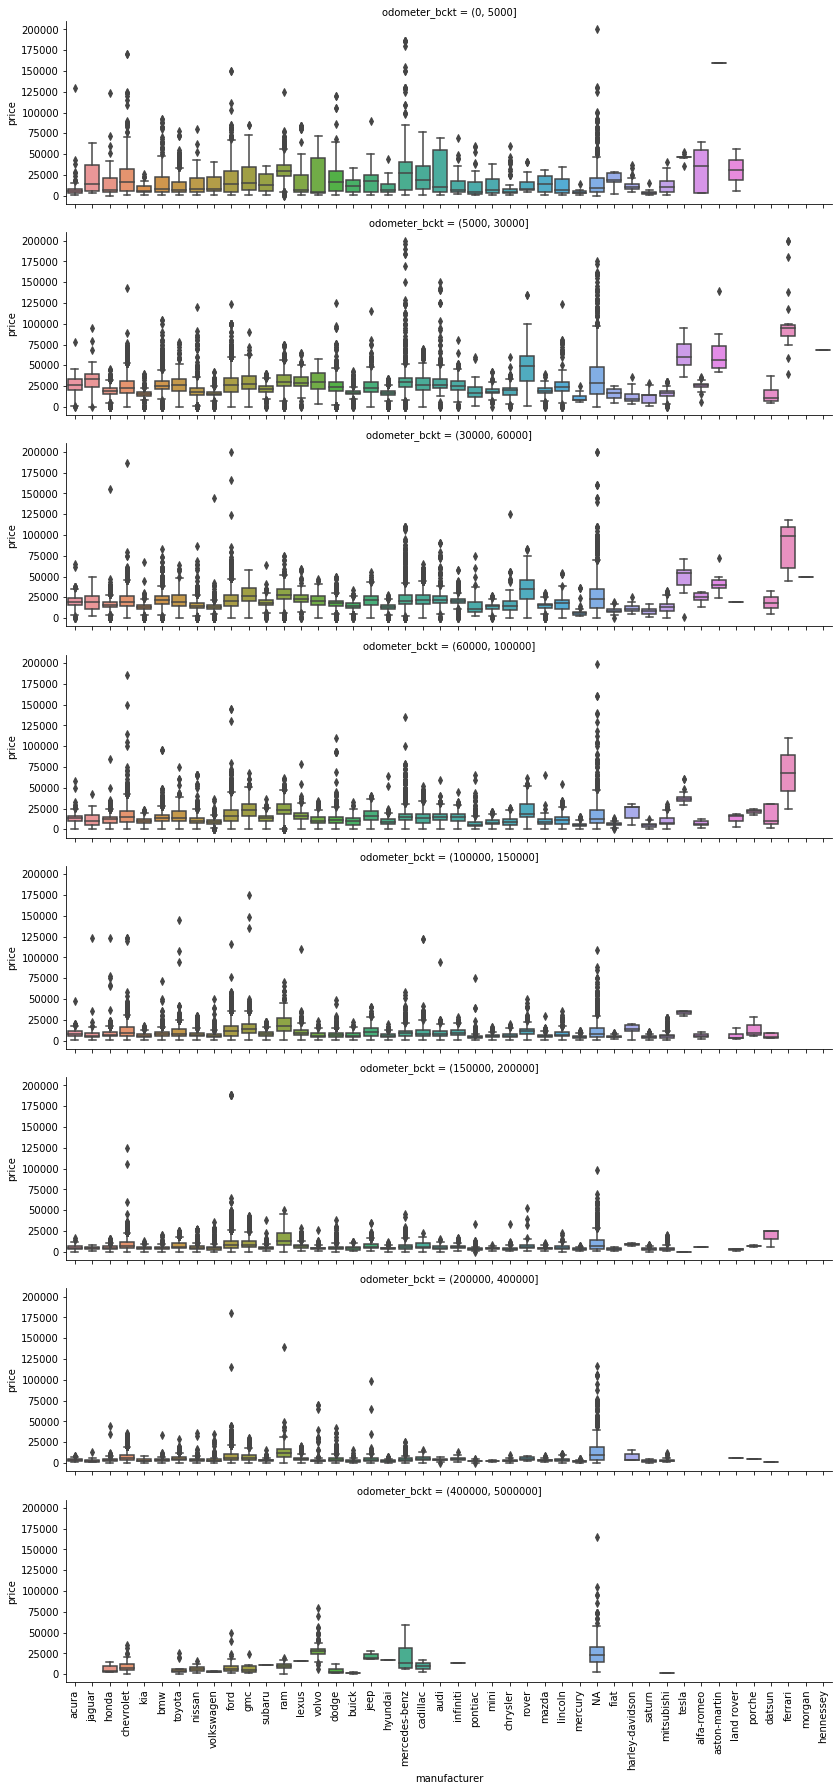

In [42]:
g = sns.catplot(x="manufacturer", y="price",
                row="odometer_bckt",
                data=used_cars, kind="box",
                height=3, aspect=4);
x=plt.xticks(rotation=90)

#### Plotly vs Seaborn
- Plotly is a visualization library that produces highly interactive charts excellent for interactive exploratory data analysis
- Seaborn is a light weight, easy to use visualization library with excellent out of the box defaults

In [ ]:
#Plotly Boxplot (Resource Heavy, Very interactive)
fig = px.box(used_cars, x="manufacturer", y="price")
#fig.update_layout(width=900,height=400)
fig.show()

In [4]:
cnts = used_cars[['id','manufacturer']].groupby('manufacturer').count().reset_index().sort_values(by='id',ascending=False)
cnts['pct']=cnts['id'].cumsum()/485208

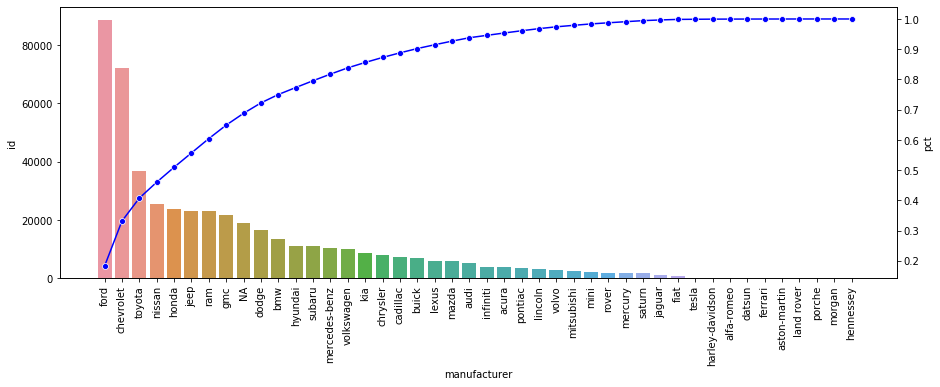

In [5]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
sns.barplot(y="id", x="manufacturer", ax=ax1,data=cnts)
sns.lineplot(y="pct",x="manufacturer",color='b',marker="o",ax=ax2,data=cnts,sort=False)
labels = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

- Used car listing are dominated by American manufacturers Ford and Chevrolet.
- Followed by Toyota, Nissan, Honda, Jeep and Ram
- Top 13 Car manufacturers account for 80% of listings

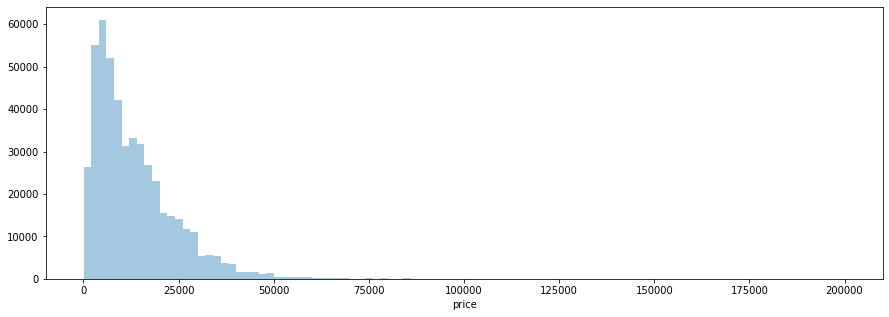

In [6]:
plt.figure(figsize=(15,5))
ax = sns.distplot(used_cars['price'],bins=100,kde=False)

- Used car prices are right skewed with most cars in the 0 to $50,000 range

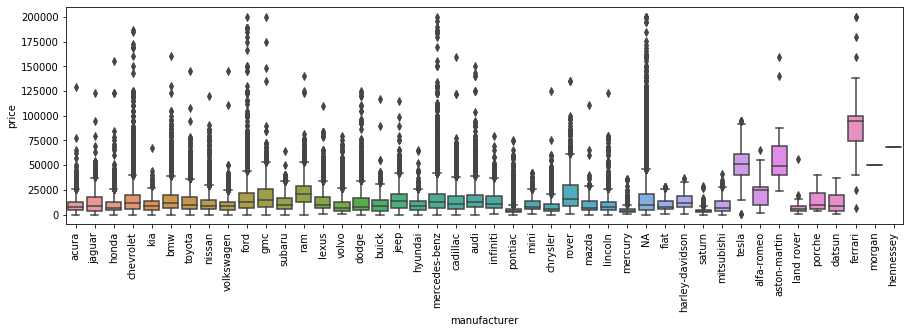

In [7]:
#Seaborn Boxplot (Light weight, Non-Interactive)
plt.figure(figsize=figsize)
axx = sns.boxplot( y=used_cars["price"], x=used_cars["manufacturer"] );
axx.set_xticklabels(axx.get_xticklabels(), rotation=90)
plt.show()

- Ferraris are the king of the pricing hill. Aston Martins and Teslas also attract significantly higher prices
- Noteworthy are GMC, RAM, Rover ans Alfa-Romeo with higher maximum and median prices

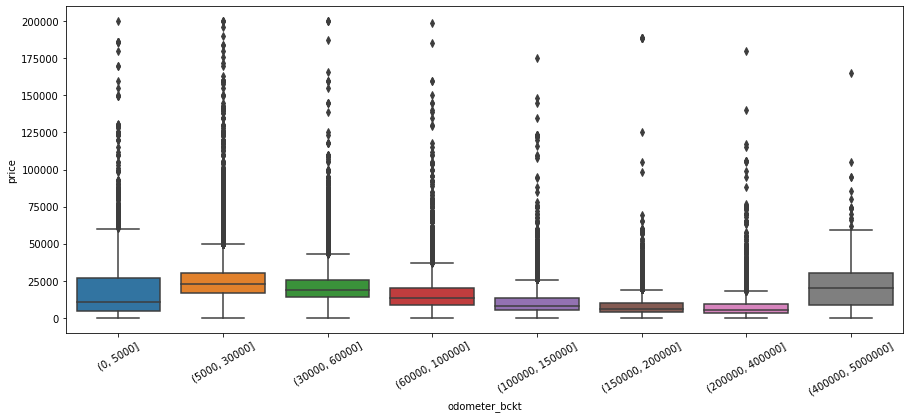

In [8]:
plt.figure(figsize=(15,6))
axx = sns.boxplot( y=used_cars["price"], x=used_cars["odometer_bckt"] );
n_labels =axx.set_xticklabels(axx.get_xticklabels(), rotation=30)

- Lower odometer values command higher prices
- The 400,000 Miles+ bucket bucks this trend. Requires further investigation

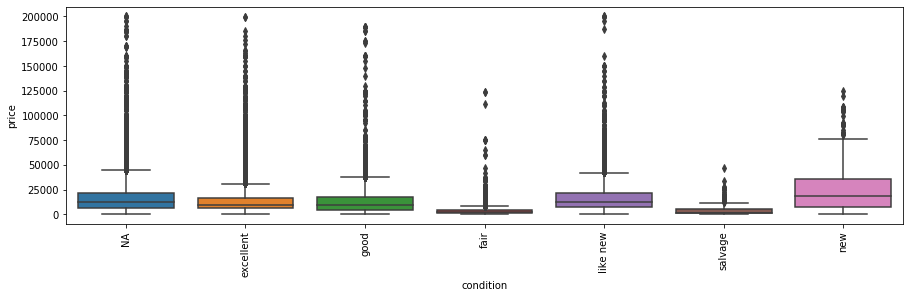

In [9]:
#Seaborn Boxplot (Light weight, Non-Interactive)
plt.figure(figsize=figsize)
axx = sns.boxplot( y=used_cars["price"], x=used_cars["condition"] );
axx.set_xticklabels(axx.get_xticklabels(), rotation=90)
plt.show()

- New cars command higher prices.
- Excellent and good cars have very similar price ranges but good cars have a wider spread. This speaks to some subjectivity in the classification 
- Like-new attracts a higher price range than excellent/ good and lower than new cars
- Salvaged cars sit at the bottom

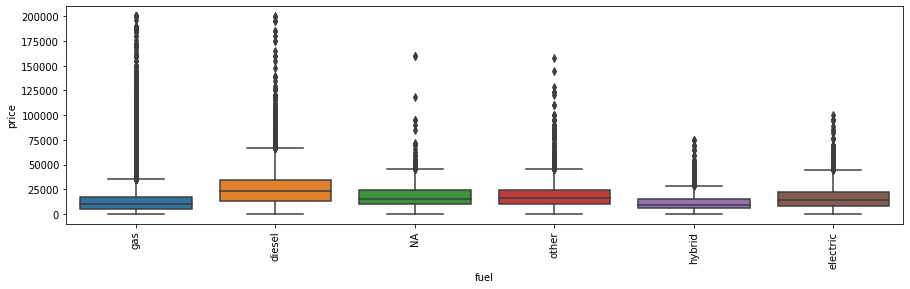

In [10]:
#Seaborn Boxplot (Light weight, Non-Interactive)
plt.figure(figsize=figsize)
axx = sns.boxplot( y=used_cars["price"], x=used_cars["fuel"] );
axx.set_xticklabels(axx.get_xticklabels(), rotation=90)
plt.show()

- Diesel engines seem to command higher prices than other engine types

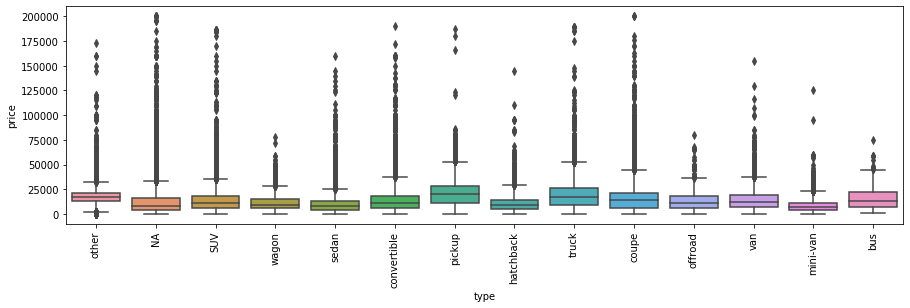

In [11]:
#Seaborn Boxplot (Light weight, Non-Interactive)
plt.figure(figsize=figsize)
axx = sns.boxplot( y=used_cars["price"], x=used_cars["type"] );
axx.set_xticklabels(axx.get_xticklabels(), rotation=90)
plt.show()

- Pickups, Trucks and Buses command higher prices

#### Data Mining Scenario
- Identify Ford Cars upsell oppourtunities

- Read EDA grouping files

In [3]:
from glob import glob
filenames = glob('eda/group*.csv')
eda_df_list = [pd.read_csv(f) for f in filenames]
eda_dataframes = pd.concat(eda_df_list,axis=0).reset_index()

- Explore Ford vehicles along the "Fuel" and "Drive" dimensions
- Establish a confidence level in the legitimacy of a potential upsell oppourtunity
- Estimated Potential Additional Income per Upsell

#### Data extract

In [4]:
eda_dataframes[(eda_dataframes.agg_cols=='manufacturer>fuel>drive')\
              &(eda_dataframes.agg_cols_data.str.contains('ford'))]\
              .sort_values(by='price_mean',ascending=False).head(10)

,index,agg_cols,agg_cols_cnt,agg_cols_data,price_std,price_mean,price_sum,price_count
864127,180,manufacturer>fuel>drive,3,ford>electric>4wd,18381.947884,29997.000000,59994.0,2.0
864123,176,manufacturer>fuel>drive,3,ford>diesel>4wd,14608.400673,26278.236015,240051686.0,9135.0
864138,191,manufacturer>fuel>drive,3,ford>other>4wd,12588.204249,25134.644761,40542182.0,1613.0
864119,172,manufacturer>fuel>drive,3,ford>NA>4wd,10992.860568,23824.294872,3716590.0,156.0
864124,177,manufacturer>fuel>drive,3,ford>diesel>NA,15615.524611,22393.141304,72105915.0,3220.0
864139,192,manufacturer>fuel>drive,3,ford>other>NA,9899.078660,17878.595628,19630698.0,1098.0
864122,175,manufacturer>fuel>drive,3,ford>NA>rwd,8962.009395,17395.493671,2748488.0,158.0
864125,178,manufacturer>fuel>drive,3,ford>diesel>fwd,15512.745684,16947.573604,3338672.0,197.0
864130,183,manufacturer>fuel>drive,3,ford>gas>4wd,10929.868897,16667.453741,406969218.0,24417.0
864126,179,manufacturer>fuel>drive,3,ford>diesel>rwd,11218.065943,16157.113940,25382826.0,1571.0


#### Calculate Upsell oppourtunity confidence and potential additional revenue
- Extract required parameters from dataset

In [6]:
ford_diesel_4wd = eda_dataframes[eda_dataframes['agg_cols_data']=='ford>diesel>4wd']
ford_gas_4wd = eda_dataframes[eda_dataframes['agg_cols_data']=='ford>gas>4wd']
ford_gas_fwd = eda_dataframes[eda_dataframes['agg_cols_data']=='ford>gas>fwd']

In [7]:
*a,stdv1,mean1,_,n1=ford_gas_4wd.values[0]
*a,stdv2,mean2,_,n2=ford_diesel_4wd.values[0]
*a,stdv3,mean3,_,n3=ford_gas_fwd.values[0]

#### Upsell potential
- Ford Gas 4WD to Ford Diesel 4WD

In [8]:
compute_2tail_2sample_tscore(mean1, mean2,stdv1,stdv2,n1,n2)

{'t_score': 28.58839752266444,
 'p_value': 3.83138741455738e-177,
 'est_value': 9610.782274079818,
 'df': 24416.0}

- The p-value indicates high confidence that additional revenue can be driven by upselling from **Ford Gas 4WD** to **Ford Diesel 4WD**
- The estimated additional income per upsell is **$9610.78**

#### Upsell potential
- Ford Gas FWD to Ford Gas 4WD

In [9]:
compute_2tail_2sample_tscore(mean1, mean3,stdv1,stdv3,n1,n3)

{'t_score': 41.81322856089574,
 'p_value': 0.0,
 'est_value': 7338.952536789364,
 'df': 24416.0}

- There's near certainty that additional revenue can be driven by upselling from **Ford Gas FWD** to **Ford Gas 4WD**
- The estimated additional income per upsell is **$7338.95**

### Up Next ...
- Predictive Modeling for car prices